# Mitsuba quickstart

## Overview

In this tutorial, you will render your very first image using Mitsuba 3!

<div class="admonition important alert alert-block alert-success">

🚀 **You will learn how to:**

<ul>
  <li>Import Mitsuba in Python and set the "variant"</li>
  <li>Load a scene from disk</li>
  <li>Render a scene</li>
  <li>Write a rendered image to disk</li>
</ul>

</div>

## Importing Mitsuba

After [installing][1] the Mitsuba Python module, it can be imported as follows:

[1]:https://mitsuba.readthedocs.io/en/latest/index.html#installation

In [2]:
import mitsuba as mi

We use the short alias `mi` for `mitsuba` to improve code readability.

Mitsuba is a *retargetable* system that supports a variety of different computational backends (e.g., GPU, CPU), color representations (e.g., RGB, spectral or polarized) and floating point precisions (single and double precision). We call a specific combination of these attributes a *variant* of the renderer. For more information about the supported variants, please refer to the [dedicated section][2] in the documentation.

In brief the system implements the following computational backends:

- `scalar`: runs on CPU, using normal floating point arithmetic, processing individual rays at a time
- `llvm`: runs on CPU, automatically parallelized over cores and vector units
- `cuda`: runs on NVidia GPU in parallel

Under the hood, we essentially compile a different renderer for each variant. Therefore, using any components of the system requires first setting the desired variant using the [<code>set_variant()</code>][1] function. Only then function calls or class instantiations can be routed to a specific underlying implementation. For most use cases, it is sufficient to set the variant once at the beginning of the program. For example, if your project consists of a `my_script.py` file with some helper functions in a `my_utils.py`, you most likely only want to specify the variant at the beginning of the execution in `my_script.py`. It is possible to switch the variant at any point of the execution, but this should typically not be necessary. Plugins and objects created using different variants are not compatible (e.g., it's not possible to load a scene in a GPU variant and then render it on the CPU).

Using the [<code>variants()</code>][3] function, it is possible to list all Mitsuba variants installed on your system:

[1]:https://mitsuba.readthedocs.io/en/latest/src/api_reference.html#mitsuba.set_variant
[2]:https://mitsuba.readthedocs.io/en/latest/src/key_topics/variants.html
[3]:https://mitsuba.readthedocs.io/en/latest/src/api_reference.html#mitsuba.variants

In [3]:
mi.variants()

['scalar_rgb', 'scalar_spectral', 'cuda_ad_rgb', 'llvm_ad_rgb']

For this tutorial, we will use the simplest variant: `scalar_rgb`. As the name implies, computations will be performed in a scalar-fashion (i.e., not vectorized) on the CPU and the light transport simulation will operate on RGB color values. The code in the rest of the tutorial is agnostic to the variant and could for example also be run using a GPU variant of the system. We will discuss these and other variants in later tutorials.

In [4]:
mi.set_variant("scalar_rgb")

<div class="admonition important alert alert-block alert-info">
    
📑 **Note**
    
If your are new to the Mitsuba Python API, is it important to remember that you can use the `help()` function on Mitsuba classes and functions to read the well-documented API reference. Additionally, Mitsuba 3 has support for autocomplete with most modern IDEs to make things easier for new users.
</div>

## Loading a scene

In this tutorial, we are going to load a Mitsuba scene from a file on disk. Mitsuba scenes are described using a simple and general [XML-based format][1].

A [few example scenes][2] can be downloaded clicking the "Download data" button at the top of the tutorial page. We can then load a scene from an XML file using the [<code>load_file()</code>][3] function:

[1]: https://mitsuba.readthedocs.io/en/latest/src/key_topics/scene_format.html
[2]: https://rgl.s3.eu-central-1.amazonaws.com/scenes/tutorials/scenes.zip
[3]: https://mitsuba.readthedocs.io/en/latest/src/api_reference.html#mitsuba.load_file

In [6]:
scene = mi.load_file("../scenes/cbox.xml")

## Rendering a scene

Once loaded into memory, a scene can be rendered using the [<code>render()</code>][1] function. The `render()` function has a variety of optional arguments. We can for example pass the desired number of samples per pixel (SPP).

[1]: https://mitsuba.readthedocs.io/en/latest/src/api_reference.html#mitsuba.render

In [7]:
image = mi.render(scene, spp=256)

The render function returns the generated image as a tensor ([<code>mi.TensorXf</code>][1], similar to a NumPy array) in linear RGB color space. The tensor class interfaces seamlessly with functions expecting NumPy arrays. For example, we can display the image using `matplotlib`.

[1]: https://mitsuba.readthedocs.io/en/latest/src/api_reference.html#mitsuba.TensorXf

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..3.7914255].


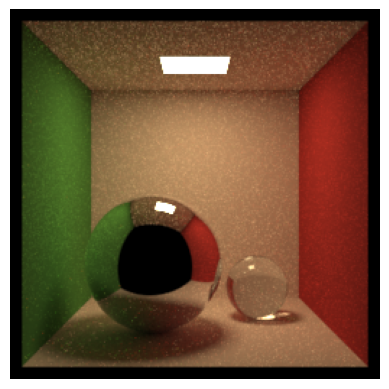

In [9]:
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(image ** (1.0 / 2.2)); # approximate sRGB tonemapping

## Writing an image to file

The [<code>mi.util.write_bitmap()</code>][1] function allows to save an image to disk and supports multiple file formats. If a low dynamic range (LDR) format is selected (e.g., PNG), this function tonemaps the image to the sRGB color space before saving.

[1]: https://mitsuba.readthedocs.io/en/latest/src/api_reference.html#mitsuba.util.write_bitmap

In [8]:
mi.util.write_bitmap("my_first_render.png", image)
mi.util.write_bitmap("my_first_render.exr", image)

Bravo! 🎉 
You have now successfully rendered your first image!

## See also

- [<code>mitsuba.set_variant()</code>][1]
- [<code>mitsuba.load_file()</code>][2]
- [<code>mitsuba.render()</code>][3]
- [<code>mitsuba.util.write_bitmap()</code>][4]

[1]: https://mitsuba.readthedocs.io/en/latest/src/api_reference.html#mitsuba.set_variant
[2]: https://mitsuba.readthedocs.io/en/latest/src/api_reference.html#mitsuba.load_file
[3]: https://mitsuba.readthedocs.io/en/latest/src/api_reference.html#mitsuba.render
[4]: https://mitsuba.readthedocs.io/en/latest/src/api_reference.html#mitsuba.Bitmap.write